#Step 1: Import Data



##1.1 Import packages


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        col_type2 = df[col].dtype.name
        
        if ((col_type != object) and (col_type2 != 'category')):
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [ ]:
import pandas as pd
import numpy as np
import gc #Garbage Collector to free up memory
gc.enable

<function gc.enable>

In [ ]:
import pandas as pd
new_features = reduce_mem_usage(pd.read_csv('/content/gdrive/My Drive/Dataset/new_features.csv'))

Memory usage of dataframe is 2030.63 MB
Memory usage after optimization is: 596.50 MB
Decreased by 70.6%


In [ ]:
orders = reduce_mem_usage(pd.read_csv('/content/gdrive/My Drive/Dataset/orders.csv'))

Memory usage of dataframe is 182.71 MB
Memory usage after optimization is: 45.68 MB
Decreased by 75.0%


In [ ]:
order_products__train = reduce_mem_usage(pd.read_csv('/content/gdrive/My Drive/Dataset/order_products__train.csv'))

Memory usage of dataframe is 42.26 MB
Memory usage after optimization is: 13.20 MB
Decreased by 68.7%


#3.Split into Train and Test DataFrame

In [ ]:
new_features.shape

(13307953, 20)

In [ ]:
new_features.head()

,Unnamed: 0,user_id,product_id,up_total_bought,up_reorder_ratio,number_times_last5,total_items,total_distinct_items,user_average_days_between_orders,user_number_orders,user_avg_basket,user_total_orders,user_reordered_ratio,product_orders_total,product_reorder_total,product_reorder_rate,aisle_id,department_id,eval_set,order_id
0,0,1,196,10,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,35791,27791.0,0.776367,77,7,train,1187899
1,1,1,10258,9,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,1946,1389.0,0.713867,117,19,train,1187899
2,2,1,10326,1,0.166626,0.0,59,18,19.0,11,5.363281,10,0.694824,5526,3603.0,0.651855,24,4,train,1187899
3,3,1,12427,10,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,6476,4797.0,0.740723,23,19,train,1187899
4,4,1,13032,3,0.333252,2.0,59,18,19.0,11,5.363281,10,0.694824,3751,2465.0,0.657227,121,14,train,1187899


In [ ]:
new_features = new_features.drop(['Unnamed: 0'], axis=1)

In [ ]:
new_features.head()

,user_id,product_id,up_total_bought,up_reorder_ratio,number_times_last5,total_items,total_distinct_items,user_average_days_between_orders,user_number_orders,user_avg_basket,user_total_orders,user_reordered_ratio,product_orders_total,product_reorder_total,product_reorder_rate,aisle_id,department_id,eval_set,order_id
0,1,196,10,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,35791,27791.0,0.776367,77,7,train,1187899
1,1,10258,9,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,1946,1389.0,0.713867,117,19,train,1187899
2,1,10326,1,0.166626,0.0,59,18,19.0,11,5.363281,10,0.694824,5526,3603.0,0.651855,24,4,train,1187899
3,1,12427,10,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,6476,4797.0,0.740723,23,19,train,1187899
4,1,13032,3,0.333252,2.0,59,18,19.0,11,5.363281,10,0.694824,3751,2465.0,0.657227,121,14,train,1187899


##3.1Create Train DataFrame


In [ ]:
#Filter eval_set for just train to create the train DataFrame
new_features_train = reduce_mem_usage(new_features[new_features.eval_set=='train'])
new_features_train.head(n=10)

Memory usage of dataframe is 412.19 MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

Memory usage after optimization is: 412.19 MB
Decreased by 0.0%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,user_id,product_id,up_total_bought,up_reorder_ratio,number_times_last5,total_items,total_distinct_items,user_average_days_between_orders,user_number_orders,user_avg_basket,user_total_orders,user_reordered_ratio,product_orders_total,product_reorder_total,product_reorder_rate,aisle_id,department_id,eval_set,order_id
0,1,196,10,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,35791,27791.0,0.776367,77,7,train,1187899
1,1,10258,9,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,1946,1389.0,0.713867,117,19,train,1187899
2,1,10326,1,0.166626,0.0,59,18,19.0,11,5.363281,10,0.694824,5526,3603.0,0.651855,24,4,train,1187899
3,1,12427,10,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,6476,4797.0,0.740723,23,19,train,1187899
4,1,13032,3,0.333252,2.0,59,18,19.0,11,5.363281,10,0.694824,3751,2465.0,0.657227,121,14,train,1187899
5,1,13176,2,0.222168,0.0,59,18,19.0,11,5.363281,10,0.694824,379450,315913.0,0.832520,24,4,train,1187899
6,1,14084,1,0.099976,0.0,59,18,19.0,11,5.363281,10,0.694824,15935,12923.0,0.811035,91,16,train,1187899
7,1,17122,1,0.166626,0.0,59,18,19.0,11,5.363281,10,0.694824,13880,9377.0,0.675781,24,4,train,1187899
8,1,25133,8,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,6196,4586.0,0.740234,21,16,train,1187899
9,1,26088,2,0.199951,0.0,59,18,19.0,11,5.363281,10,0.694824,2523,1360.0,0.539062,23,19,train,1187899


In [ ]:
#Get the features from the order_products_train DataFrame
new_features_train = reduce_mem_usage(new_features_train.merge(order_products__train[['product_id','order_id','reordered']], on=['product_id', 'order_id'], how='left'))
new_features_train.head(n=10)


Memory usage of dataframe is 476.84 MB
Memory usage after optimization is: 428.35 MB
Decreased by 10.2%


,user_id,product_id,up_total_bought,up_reorder_ratio,number_times_last5,total_items,total_distinct_items,user_average_days_between_orders,user_number_orders,user_avg_basket,user_total_orders,user_reordered_ratio,product_orders_total,product_reorder_total,product_reorder_rate,aisle_id,department_id,eval_set,order_id,reordered
0,1,196,10,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,35791,27791.0,0.776367,77,7,train,1187899,1.0
1,1,10258,9,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,1946,1389.0,0.713867,117,19,train,1187899,1.0
2,1,10326,1,0.166626,0.0,59,18,19.0,11,5.363281,10,0.694824,5526,3603.0,0.651855,24,4,train,1187899,NaN
3,1,12427,10,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,6476,4797.0,0.740723,23,19,train,1187899,NaN
4,1,13032,3,0.333252,2.0,59,18,19.0,11,5.363281,10,0.694824,3751,2465.0,0.657227,121,14,train,1187899,1.0
5,1,13176,2,0.222168,0.0,59,18,19.0,11,5.363281,10,0.694824,379450,315913.0,0.832520,24,4,train,1187899,NaN
6,1,14084,1,0.099976,0.0,59,18,19.0,11,5.363281,10,0.694824,15935,12923.0,0.811035,91,16,train,1187899,NaN
7,1,17122,1,0.166626,0.0,59,18,19.0,11,5.363281,10,0.694824,13880,9377.0,0.675781,24,4,train,1187899,NaN
8,1,25133,8,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,6196,4586.0,0.740234,21,16,train,1187899,1.0
9,1,26088,2,0.199951,0.0,59,18,19.0,11,5.363281,10,0.694824,2523,1360.0,0.539062,23,19,train,1187899,1.0


In [ ]:
#Fill in 'reordered' column where NaN
new_features_train['reordered'] = new_features_train['reordered'].fillna(0)
new_features_train.head(n=10)

,user_id,product_id,up_total_bought,up_reorder_ratio,number_times_last5,total_items,total_distinct_items,user_average_days_between_orders,user_number_orders,user_avg_basket,user_total_orders,user_reordered_ratio,product_orders_total,product_reorder_total,product_reorder_rate,aisle_id,department_id,eval_set,order_id,reordered
0,1,196,10,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,35791,27791.0,0.776367,77,7,train,1187899,1.0
1,1,10258,9,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,1946,1389.0,0.713867,117,19,train,1187899,1.0
2,1,10326,1,0.166626,0.0,59,18,19.0,11,5.363281,10,0.694824,5526,3603.0,0.651855,24,4,train,1187899,0.0
3,1,12427,10,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,6476,4797.0,0.740723,23,19,train,1187899,0.0
4,1,13032,3,0.333252,2.0,59,18,19.0,11,5.363281,10,0.694824,3751,2465.0,0.657227,121,14,train,1187899,1.0
5,1,13176,2,0.222168,0.0,59,18,19.0,11,5.363281,10,0.694824,379450,315913.0,0.832520,24,4,train,1187899,0.0
6,1,14084,1,0.099976,0.0,59,18,19.0,11,5.363281,10,0.694824,15935,12923.0,0.811035,91,16,train,1187899,0.0
7,1,17122,1,0.166626,0.0,59,18,19.0,11,5.363281,10,0.694824,13880,9377.0,0.675781,24,4,train,1187899,0.0
8,1,25133,8,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,6196,4586.0,0.740234,21,16,train,1187899,1.0
9,1,26088,2,0.199951,0.0,59,18,19.0,11,5.363281,10,0.694824,2523,1360.0,0.539062,23,19,train,1187899,1.0


In [ ]:
#Create a unique index that describe each row using user_id and product_id
new_features_train = new_features_train.set_index(['user_id', 'product_id'])
new_features_train.head(n=10)

up_total_bought  up_reorder_ratio  ...  order_id  reordered
user_id product_id                                     ...                     
1       196                      10          1.000000  ...   1187899        1.0
        10258                     9          1.000000  ...   1187899        1.0
        10326                     1          0.166626  ...   1187899        0.0
        12427                    10          1.000000  ...   1187899        0.0
        13032                     3          0.333252  ...   1187899        1.0
        13176                     2          0.222168  ...   1187899        0.0
        14084                     1          0.099976  ...   1187899        0.0
        17122                     1          0.166626  ...   1187899        0.0
        25133                     8          1.000000  ...   1187899        1.0
        26088                     2          0.199951  ...   1187899        1.0

[10 rows x 18 columns]

In [ ]:
#Remove features which are not predictors
new_features_train = new_features_train.drop(['eval_set', 'order_id'], axis=1)
new_features_train.head()

up_total_bought  up_reorder_ratio  ...  department_id  reordered
user_id product_id                                     ...                          
1       196                      10          1.000000  ...              7        1.0
        10258                     9          1.000000  ...             19        1.0
        10326                     1          0.166626  ...              4        0.0
        12427                    10          1.000000  ...             19        0.0
        13032                     3          0.333252  ...             14        1.0

[5 rows x 16 columns]

In [ ]:
new_features_train.head()

up_total_bought  up_reorder_ratio  ...  department_id  reordered
user_id product_id                                     ...                          
1       196                      10          1.000000  ...              7        1.0
        10258                     9          1.000000  ...             19        1.0
        10326                     1          0.166626  ...              4        0.0
        12427                    10          1.000000  ...             19        0.0
        13032                     3          0.333252  ...             14        1.0

[5 rows x 16 columns]

##3.2 Create Test DataFrame

In [ ]:
new_features_test = reduce_mem_usage(new_features[new_features.eval_set == 'test'])
new_features_test.head()

Memory usage of dataframe is 235.08 MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

Memory usage after optimization is: 235.08 MB
Decreased by 0.0%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,user_id,product_id,up_total_bought,up_reorder_ratio,number_times_last5,total_items,total_distinct_items,user_average_days_between_orders,user_number_orders,user_avg_basket,user_total_orders,user_reordered_ratio,product_orders_total,product_reorder_total,product_reorder_rate,aisle_id,department_id,eval_set,order_id
120,3,248,1,0.090881,0.0,88,33,12.0,13,6.769531,12,0.625,6371,2550.0,0.400146,117,19,test,2774568
121,3,1005,1,0.333252,1.0,88,33,12.0,13,6.769531,12,0.625,463,204.0,0.440674,94,7,test,2774568
122,3,1819,3,0.333252,0.0,88,33,12.0,13,6.769531,12,0.625,2424,1193.0,0.492188,88,13,test,2774568
123,3,7503,1,0.099976,0.0,88,33,12.0,13,6.769531,12,0.625,12474,6905.0,0.553711,117,19,test,2774568
124,3,8021,1,0.090881,0.0,88,33,12.0,13,6.769531,12,0.625,27864,16472.0,0.591309,54,17,test,2774568


In [ ]:
#Create a unique index for the dataframe using user_id and product_id
new_features_test = new_features_test.set_index(['user_id', 'product_id'])
new_features.head()

,user_id,product_id,up_total_bought,up_reorder_ratio,number_times_last5,total_items,total_distinct_items,user_average_days_between_orders,user_number_orders,user_avg_basket,user_total_orders,user_reordered_ratio,product_orders_total,product_reorder_total,product_reorder_rate,aisle_id,department_id,eval_set,order_id
0,1,196,10,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,35791,27791.0,0.776367,77,7,train,1187899
1,1,10258,9,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,1946,1389.0,0.713867,117,19,train,1187899
2,1,10326,1,0.166626,0.0,59,18,19.0,11,5.363281,10,0.694824,5526,3603.0,0.651855,24,4,train,1187899
3,1,12427,10,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,6476,4797.0,0.740723,23,19,train,1187899
4,1,13032,3,0.333252,2.0,59,18,19.0,11,5.363281,10,0.694824,3751,2465.0,0.657227,121,14,train,1187899


In [ ]:
#Remove features which are not predictors
new_features_test = new_features_test.drop(['eval_set', 'order_id'], axis=1)
new_features.head()

,user_id,product_id,up_total_bought,up_reorder_ratio,number_times_last5,total_items,total_distinct_items,user_average_days_between_orders,user_number_orders,user_avg_basket,user_total_orders,user_reordered_ratio,product_orders_total,product_reorder_total,product_reorder_rate,aisle_id,department_id,eval_set,order_id
0,1,196,10,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,35791,27791.0,0.776367,77,7,train,1187899
1,1,10258,9,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,1946,1389.0,0.713867,117,19,train,1187899
2,1,10326,1,0.166626,0.0,59,18,19.0,11,5.363281,10,0.694824,5526,3603.0,0.651855,24,4,train,1187899
3,1,12427,10,1.000000,5.0,59,18,19.0,11,5.363281,10,0.694824,6476,4797.0,0.740723,23,19,train,1187899
4,1,13032,3,0.333252,2.0,59,18,19.0,11,5.363281,10,0.694824,3751,2465.0,0.657227,121,14,train,1187899


In [ ]:
new_features_test.head()

up_total_bought  up_reorder_ratio  ...  aisle_id  department_id
user_id product_id                                     ...                         
3       248                       1          0.090881  ...       117             19
        1005                      1          0.333252  ...        94              7
        1819                      3          0.333252  ...        88             13
        7503                      1          0.099976  ...       117             19
        8021                      1          0.090881  ...        54             17

[5 rows x 15 columns]

In [ ]:
new_features_train.head()

up_total_bought  up_reorder_ratio  ...  department_id  reordered
user_id product_id                                     ...                          
1       196                      10          1.000000  ...              7        1.0
        10258                     9          1.000000  ...             19        1.0
        10326                     1          0.166626  ...              4        0.0
        12427                    10          1.000000  ...             19        0.0
        13032                     3          0.333252  ...             14        1.0

[5 rows x 16 columns]

In [ ]:
new_features_test.shape


(4833292, 15)

In [ ]:
new_features_test.shape
new_features_test.info

<bound method DataFrame.info of                     up_total_bought  up_reorder_ratio  ...  aisle_id  department_id
user_id product_id                                     ...                         
3       248                       1          0.090881  ...       117             19
        1005                      1          0.333252  ...        94              7
        1819                      3          0.333252  ...        88             13
        7503                      1          0.099976  ...       117             19
        8021                      1          0.090881  ...        54             17
...                             ...               ...  ...       ...            ...
206208  48364                     1          0.021271  ...        83              4
        48865                     1          0.125000  ...       100             21
        49247                     1          0.022720  ...       120             16
        49385                     1         

#XGBoost

In [ ]:
#Import required packages
import xgboost as xgb

In [ ]:
#Further split training set (new_features_train DataFrame) into train and test set to validate our model
from sklearn.model_selection import train_test_split, StratifiedKFold

In [ ]:
#Split into smaller DataFrame for east of working with and faster processing time
new_features_train2 = new_features_train.sample(n=50000)

In [ ]:
#Split DataFrame into X_train, y_train
X_train, X_test = train_test_split(new_features_train2, test_size=0.3, random_state=42)

In [ ]:
#Split the target from the features
X_train_features = X_train.drop(['reordered'], axis=1)
Y_train_target = X_train['reordered']

In [ ]:
#Prepare test data
#Split feature and target
X_test_features = X_test.drop(['reordered'], axis=1)
Y_test_target = X_test['reordered']

In [ ]:
#Set Booster's Parameters
parameters = {'eval_metric':'logloss', 
              'max_depth':'5', 
              'colsample_bytree':'0.4',
              'subsample':'0.75'
             }

In [ ]:
#XGBClassifier
xgbc = xgb.XGBClassifier(objective='binary:logistic', parameters=parameters, num_boost_round=10)

In [ ]:
model = xgbc.fit(X_train_features, Y_train_target)

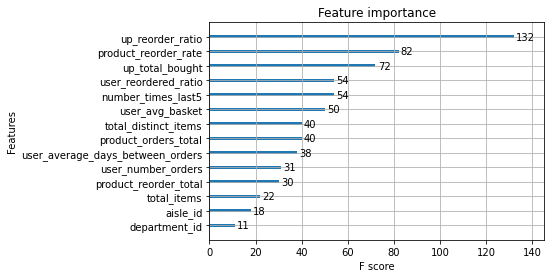

In [ ]:
xgb.plot_importance(model)

In [ ]:
model.get_xgb_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'nthread': 1,
 'num_boost_round': 10,
 'objective': 'binary:logistic',
 'parameters': {'colsample_bytree': '0.4',
  'eval_metric': 'logloss',
  'max_depth': '5',
  'subsample': '0.75'},
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 0,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
paramGrid = {"max_depth":[5,10],
             "colsample_bytree":[0.3,0.4]}

In [ ]:
#Define how to train different models
from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(xgbc, paramGrid, )

In [ ]:
xgbc = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', num_boost_round=10)

In [ ]:
gridsearch = GridSearchCV(xgbc, paramGrid, cv=3, verbose=2, n_jobs=-1)

In [ ]:
model = gridsearch.fit(X_train_features, Y_train_target)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   20.6s finished


In [ ]:
model = gridsearch.best_estimator_

In [ ]:
model.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, eval_metric='logloss',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, num_boost_round=10, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)>

In [ ]:
X_test_features.shape

(15000, 15)

In [ ]:
X_train_features.shape

(35000, 15)

In [ ]:
X_train_features.head(n=5)


,,up_total_bought,up_reorder_ratio,number_times_last5,total_items,total_distinct_items,user_average_days_between_orders,user_number_orders,user_avg_basket,user_total_orders,user_reordered_ratio,product_orders_total,product_reorder_total,product_reorder_rate,aisle_id,department_id
user_id,product_id,,,,,,,,,,,,,,,
34613,44142,4,0.571289,3.0,87,53,17.578125,8,10.875000,7,0.390869,43009,23609.0,0.548828,83,4
76238,4461,1,0.037048,0.0,590,190,7.105469,49,12.039062,48,0.677734,8408,2176.0,0.258789,19,13
8108,25466,2,0.222168,0.0,35,25,14.335938,10,3.500000,9,0.285645,13494,9759.0,0.723145,115,7
62282,7054,1,0.083313,0.0,297,131,10.726562,30,9.898438,29,0.559082,5934,4108.0,0.692383,120,16
125517,26165,1,0.500000,1.0,752,323,5.859375,58,12.968750,57,0.570312,20735,15964.0,0.770020,115,7


In [ ]:
X_test_features.head(n=5)

,,up_total_bought,up_reorder_ratio,number_times_last5,total_items,total_distinct_items,user_average_days_between_orders,user_number_orders,user_avg_basket,user_total_orders,user_reordered_ratio,product_orders_total,product_reorder_total,product_reorder_rate,aisle_id,department_id
user_id,product_id,,,,,,,,,,,,,,,
48276,27423,1,0.049988,0.0,419,149,12.460938,27,15.515625,26,0.644531,3262,1889.0,0.579102,4,9
104233,46900,1,0.199951,1.0,210,115,13.289062,8,26.250000,7,0.452393,6499,2670.0,0.410889,69,15
28879,34276,1,0.250000,1.0,106,50,11.750000,25,4.238281,24,0.528320,1087,629.0,0.578613,91,16
121804,4957,1,0.083313,0.0,126,78,19.468750,14,9.000000,13,0.380859,20758,15593.0,0.750977,120,16
120255,19966,2,0.500000,2.0,62,37,20.718750,8,7.750000,7,0.403320,1063,638.0,0.600098,13,20


In [ ]:
test_pred = model.predict(X_test_features).astype(int)

In [ ]:
X_test_features['pred'] = test_pred

In [ ]:
##Creating label column based on thresold
threshold = 0.20
X_test_features['label'] = np.where(X_test_features['pred'] > threshold, 1, 0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
f1_xgb = f1_score(X_test_features['label'], Y_test_target)
print(f1_xgb)

0.24482951369480158


In [ ]:
#Checking thresold for predicting 1
thresold = np.arange(0.1,0.61,0.02)
f1_xgb=[]
max_f1=0
for t in thresold:
    X_test_features['label'] = np.where(X_test_features['pred'] > t, 1, 0)
    f = f1_score(X_test_features['label'],Y_test_target)
    f1_xgb.append(f)
    if f > max_f1:
        max_f1 = f
        max_t = t

In [ ]:
#Plotting the importance of features
import matplotlib.pyplot as plt
plt.show()

max f1: 0.25304393859184754
thresold: 0.1


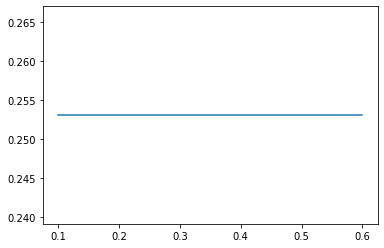

In [ ]:
plt.plot(thresold,f1_xgb)
print('max f1:',max_f1)
print('thresold:',max_t)

In [ ]:
#Predict the values for the test data and store them in a new column in the same DataFrame
#Set using a custom threshold

test_pred = (model.predict_proba(new_features_test)[:,1] >= 0.18).astype(int)
test_pred[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
new_features_test.head()

up_total_bought  up_reorder_ratio  ...  aisle_id  department_id
user_id product_id                                     ...                         
3       248                       1          0.090881  ...       117             19
        1005                      1          0.333252  ...        94              7
        1819                      3          0.333252  ...        88             13
        7503                      1          0.099976  ...       117             19
        8021                      1          0.090881  ...        54             17

[5 rows x 15 columns]

In [ ]:
#Save the prediction on a new column in the data_test DataFrame
new_features_test['prediction'] = test_pred
new_features_test.head(n=10)

up_total_bought  ...  prediction
user_id product_id                   ...            
3       248                       1  ...           0
        1005                      1  ...           0
        1819                      3  ...           0
        7503                      1  ...           0
        8021                      1  ...           0
        9387                      5  ...           0
        12845                     1  ...           0
        14992                     2  ...           0
        15143                     1  ...           0
        16797                     3  ...           1

[10 rows x 16 columns]

In [ ]:
#Reset the index
final_predict = new_features_test.reset_index()


In [ ]:
#Keep only the required columns to create submission final
final_predict = final_predict[['product_id', 'user_id', 'prediction']]
gc.collect()
final_predict.head()

,product_id,user_id,prediction
0,248,3,0
1,1005,3,0
2,1819,3,0
3,7503,3,0
4,8021,3,0


In [ ]:
#For each user_id in the test DataFrame, we need to get the order numbers and the products that were predicted to be purchased
orders_test = orders.loc[orders.eval_set=='test', ("user_id", "order_id")]
orders_test.head(n=10)

,user_id,order_id
38,3,2774568
44,4,329954
53,6,1528013
96,11,1376945
102,12,1356845
152,15,2161313
159,16,1416320
217,19,1735923
222,20,1980631
272,22,139655


In [ ]:
final_predict = final_predict.merge(orders_test, on='user_id', how='left')
final_predict.head()

,product_id,user_id,prediction,order_id
0,248,3,0,2774568
1,1005,3,0,2774568
2,1819,3,0,2774568
3,7503,3,0,2774568
4,8021,3,0,2774568


In [ ]:
#For each user_id in the test DataFrame, we need to get the order numners and the products that were predicted to be purchased
orders_test = orders.loc[orders.eval_set=='test', ("user_id", "order_id")]
orders_test.head(n=10)

,user_id,order_id
38,3,2774568
44,4,329954
53,6,1528013
96,11,1376945
102,12,1356845
152,15,2161313
159,16,1416320
217,19,1735923
222,20,1980631
272,22,139655


In [ ]:
final_predict = final_predict.merge(orders_test, on='user_id', how='left')
final_predict.head()

,product_id,user_id,prediction,order_id_x,order_id_y
0,248,3,0,2774568,2774568
1,1005,3,0,2774568,2774568
2,1819,3,0,2774568,2774568
3,7503,3,0,2774568,2774568
4,8021,3,0,2774568,2774568


In [ ]:
#Drop unnecessary columns
final_predict = final_predict.drop('user_id', axis=1)

In [ ]:
#Change product_id to integer
final_predict['product_id'] = final_predict.product_id.astype(int)

In [ ]:
#Remove unecessary DataFrames
del orders
del orders_test
gc.collect()

final_predict.head()

,product_id,prediction,order_id_x,order_id_y
0,248,0,2774568,2774568
1,1005,0,2774568,2774568
2,1819,0,2774568,2774568
3,7503,0,2774568,2774568
4,8021,0,2774568,2774568


In [ ]:
final_predict = final_predict.drop(['order_id_y'], axis=1)

In [ ]:
final_predict.head()

,product_id,prediction,order_id_x
0,248,0,2774568
1,1005,0,2774568
2,1819,0,2774568
3,7503,0,2774568
4,8021,0,2774568


In [ ]:
final_predict = final_predict.rename(columns={'order_id_x':'order_id'})

In [ ]:
#For the submission file, create a dictionary which will be used to create a map of unique keys to values.
#Index will be the order_id and the values will be the all the products that are predicted to be reordered
#If none of the products will be purchased, use the string "None."

d = dict()
for row in final_predict.itertuples():
    if row.prediction== 1:
        try:
            d[row.order_id] += ' ' + str(row.product_id)
        except:
            d[row.order_id] = str(row.product_id)

for order in final_predict.order_id:
    if order not in d:
        d[order] = 'None'
        
gc.collect()

#We now check how the dictionary were populated (open hidden output)
d

{2774568: '16797 17668 18599 21903 22035 23650 32402 39190 43961 47766',
 329954: '21573 25623 26576',
 1528013: '21903 38293',
 1376945: '8309 13176 14947 27959 35948 44632',
 1356845: '7076 7120 10863 13176 14992',
 2161313: '196 1747 10441 11266 12427 14715 27839 37710 48142',
 1416320: '5134 17948 21137 21616 21903 24852 28289 28985 41950 48283',
 1735923: '196 2192 9387 12108 15131 17008 31487 34690 35123 42913',
 1980631: '6184 9387 13575 13914 22362 41400 46061',
 139655: '13176 17794 21903 22935 24964 27845 32096 32655',
 1411408: '22008 26452',
 2940603: '10339 14947 18531 19894 30592 31615 41596 44632',
 1192143: '8424 24852 47626 49683',
 280888: '13966 19213 32566 41406',
 3202221: '4793 7781 9637 10831 11130 13629 17630 21137 21927 24489 24852 27966 39911 45364 45774 46979 48110 49215',
 3222866: '7039 7969 8501 13187 14947 15718 18894 32441 32912 33198 34254 35921 37131 38690 40706',
 707453: '694 4942 8518 12614 16797 18150 21137 21267 21903 24852 25826 25931 26209 28156

In [ ]:
#Convert the dictionary into a DataFrame
submission = pd.DataFrame.from_dict(d, orient='index')

#Reset index
submission.reset_index(inplace=True)

#Set column names
submission.columns = ['order_id', 'products']

submission.head(n=10)

,order_id,products
0,2774568,16797 17668 18599 21903 22035 23650 32402 3919...
1,329954,21573 25623 26576
2,1528013,21903 38293
3,1376945,8309 13176 14947 27959 35948 44632
4,1356845,7076 7120 10863 13176 14992
5,2161313,196 1747 10441 11266 12427 14715 27839 37710 4...
6,1416320,5134 17948 21137 21616 21903 24852 28289 28985...
7,1735923,196 2192 9387 12108 15131 17008 31487 34690 35...
8,1980631,6184 9387 13575 13914 22362 41400 46061
9,139655,13176 17794 21903 22935 24964 27845 32096 32655


In [ ]:
#Check if the submission file has all 75,000 predictions
submission.shape[0]

75000

In [ ]:
#Export to CSV
submission.to_csv('submission.csv', index=False)
files.download('submission.csv')

NameError: ignored

In [ ]:
files.download('submission6.csv')

NameError: ignored